In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc
from collections import namedtuple

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from textblob import TextBlob

import re


# text classification
def polarity_detection(text):
    return TextBlob(text).sentiment.polarity


def preprocess(line):
    line = line.lower()
    line = re.sub('@\w+', '', line) # remove username
    line = re.sub('#', '', line) # remove hastags
    line = re.sub(r'http\S+', '', line) # remove links
    line = re.sub('RT', '', line) # remove RT marker
    line = re.sub(':', '', line)
    return line 


def mapper(line):
    processed = preprocess(line)
    sentiment = polarity_detection(line)
    return (processed, sentiment)

In [2]:
sc = SparkContext("local[2]", "AppName")
ssc = StreamingContext(sc, 10)
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

fields = ('text', 'sentiment')
Tweet = namedtuple('Tweet', fields)

lines = ssc.socketTextStream("localhost", 5555)
pairs = lines.map(lambda line: mapper(line))
pairs_count = pairs.reduceByKey(lambda x, y: x + y)
pairs_count_rdds = pairs_count.map(lambda rec: Tweet( rec[0], rec[1]))

# Print the first ten elements of each RDD generated in this DStream to the console
pairs_count_rdds.pprint()

In [3]:
ssc.start()             # Start the computation
ssc.awaitTermination()  # Wait for the computation to terminate

-------------------------------------------
Time: 2021-04-27 23:02:40
-------------------------------------------
Tweet(text='', sentiment=0.0)
Tweet(text='tnpnvy27wgl1kfsvrwhsz7cxvohgsq26ve', sentiment=0.0)
Tweet(text='…  treasury hints on aml crackdown on crypto  👇rt  fullsend has been listed on p2pb2b', sentiment=0.0)
Tweet(text='good luck 😊', sentiment=0.7)
Tweet(text='.rt  here are our top 5 crypto browser extensions! 🤓', sentiment=0.625)
Tweet(text='📈 checking market prices ', sentiment=0.0)
Tweet(text='jibran nasir got 1291 votes in ge2018.', sentiment=0.0)
Tweet(text='irony is both are pretending to be powerful in pak…rt  what is $ddos and why you should care.   should i mint this? for every nftcollector and sneakerhead in this galaxy. nfts nftart nftcommunity nftcollectors ', sentiment=0.3)
Tweet(text='go figure.', sentiment=0.0)
Tweet(text="(i wonder if they'll thank their favorite influencers...?)", sentiment=0.5)
...

-------------------------------------------
Time: 2021-0

KeyboardInterrupt: 

In [10]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # Only works for Jupyter Notebooks!

UsageError: unrecognized arguments: # Only works for Jupyter Notebooks!


In [ ]:
top_10_tweets = sqlContext.sql(
    'SELECT text, sentiment FROM Tweets LIMIT 10')
top_10_tweets_df = top_10_tweets.toPandas()
top_10_tweets_df

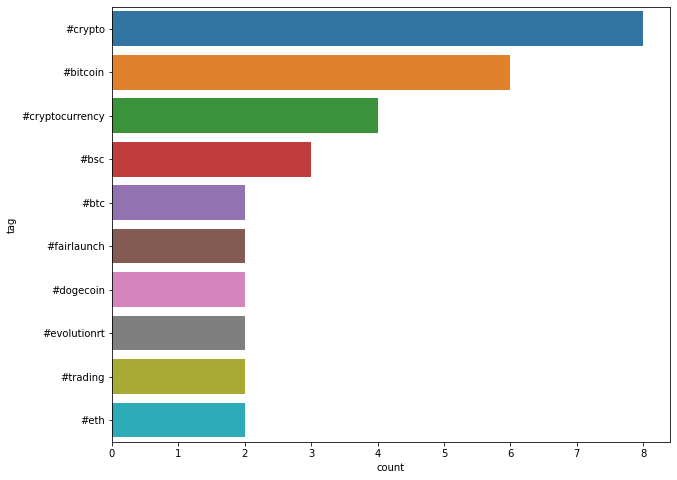

In [12]:
count = 0
while count < 10:
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets')
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1